<a href="https://colab.research.google.com/github/itsoktornado/taste-recsys/blob/main/Taste_RecSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import re
import math
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
recipes = pd.read_csv('gdrive/My Drive/FooDB/recipes.csv')
recipes

,Unnamed: 0,recipe_name,prep_time,cook_time,total_time,servings,yield,ingredients,directions,rating,url,cuisine_path,nutrition,timing,img_src
0,0,Apple-Cranberry Crostada,NaN,NaN,NaN,8,6 to 8 - servings,"3 tablespoons butter, 2 pounds Granny Smith ap...",Heat butter in a large skillet over medium-hig...,4.4,https://www.allrecipes.com/recipe/76931/apple-...,/Desserts/Fruit Desserts/Apple Dessert Recipes/,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...","Servings: 8, Yield: 6 to 8 - servings",https://www.allrecipes.com/thmb/Tf1wH73bfH6Oql...
1,1,Apple Pie by Grandma Ople,30 mins,1 hrs,1 hrs 30 mins,8,1 9-inch pie,"8 small Granny Smith apples, or as needed, ½ c...","Peel and core apples, then thinly slice. Set a...",4.8,https://www.allrecipes.com/recipe/12682/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...","Prep Time: 30 mins, Cook Time: 1 hrs, Total Ti...",https://www.allrecipes.com/thmb/1I95oiTGz6aEpu...
2,2,Sarah's Homemade Applesauce,10 mins,15 mins,25 mins,4,NaN,"4 apples - peeled, cored and chopped, ¾ cup w...","Combine apples, water, sugar, and cinnamon in ...",4.8,https://www.allrecipes.com/recipe/51301/sarahs...,/Side Dish/Applesauce Recipes/,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...","Prep Time: 10 mins, Cook Time: 15 mins, Total ...",https://www.allrecipes.com/thmb/VY5d0tZHB8xz6y...
3,3,Apple Crisp,30 mins,45 mins,1 hrs 15 mins,12,1 9x13-inch pan,"10 cups all-purpose apples, peeled, cored and ...",Preheat the oven to 350 degrees F (175 degrees...,4.7,https://www.allrecipes.com/recipe/12409/apple-...,/Desserts/Crisps and Crumbles Recipes/Apple Cr...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...","Prep Time: 30 mins, Cook Time: 45 mins, Total ...",https://www.allrecipes.com/thmb/uAzhPOh86PfR-N...
4,4,Apple Pie Filling,20 mins,20 mins,2 hrs 40 mins,40,5 9-inch pies,"18 cups thinly sliced apples, 3 tablespoons le...",Toss apples with lemon juice in a large bowl a...,4.7,https://www.allrecipes.com/recipe/12681/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...","Prep Time: 20 mins, Cook Time: 20 mins, Additi...",https://www.allrecipes.com/thmb/c0bbYaS1V_mTt_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1085,Date-Nut Balls,15 mins,10 mins,30 mins,48,4 dozen balls,"14 tablespoons butter, 1 cup pitted chopped da...",Melt butter in a saucepan over medium heat; co...,3.8,https://www.allrecipes.com/recipe/240653/date-...,/Desserts/Cookies/Fruit Cookie Recipes/Date/,"Total Fat 5g 6%, Saturated Fat 2g 12%, Cholest...","Prep Time: 15 mins, Cook Time: 10 mins, Additi...",https://www.allrecipes.com/thmb/LXm_15zLymhZ7c...
1086,1086,Jamaica Cake,NaN,NaN,NaN,14,1 - 13x9 inch pan,"2 cups white sugar, 1 ½ cups vegetable oil, 1 ...","Mix together sugar, vegetable oil, pecans, flo...",4.6,https://www.allrecipes.com/recipe/7509/jamaica...,/Desserts/Fruit Desserts/Banana Dessert Recipes/,"Total Fat 33g 43%, Saturated Fat 4g 21%, Chole...","Servings: 14, Yield: 1 - 13x9 inch pan",https://www.allrecipes.com/thmb/tI7g5xY5-qPV5v...
1087,1087,Best Hot Sauce,10 mins,20 mins,30 mins,100,2 cups,"10 fresh hot chile peppers, stems removed, 1 ...","Place peppers, onion, dates, basil, parsley, t...",4.9,https://www.allrecipes.com/recipe/242153/best-...,/Side Dish/Sauces and Condiments/,"Total Fat 1g 1%, Saturated Fat 0g 1%, Sodium 2...","Prep Time: 10 mins, Cook Time: 20 mins, Total ...",https://www.allrecipes.com/thmb/80wUYzFvbycfxx...
1088,1088,Moist Date Nut Bread,15 mins,50 mins,1 hrs 35 mins,12,1 9x5-inch loaf,"2 ½ cups chopped dates, ¼ cup butter, 1 cup bo...",Preheat the oven to 350 degrees F (175 degrees...,4.5,https://www.allrecipes.com/recipe/51446/moist-...,/Breakfast and Brunch/Breakfast Bread Recipes/,"Total Fat 10g 13%, Saturated Fat 3g 16%, Chole...","Prep Time: 15 mins, Cook Time: 50 mins, Additi...",https://www.allrecipes.com/thmb/bYsnompJZ6UAF9...


In [6]:
recipe_contents = recipes.drop(['prep_time', 'cook_time', 'total_time',
                                'directions', 'cuisine_path', 'timing',
                                'img_src', 'yield', 'Unnamed: 0', 'rating',
                                'servings'],
                               axis = 1)

recipe_contents

,recipe_name,ingredients,url,nutrition
0,Apple-Cranberry Crostada,"3 tablespoons butter, 2 pounds Granny Smith ap...",https://www.allrecipes.com/recipe/76931/apple-...,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole..."
1,Apple Pie by Grandma Ople,"8 small Granny Smith apples, or as needed, ½ c...",https://www.allrecipes.com/recipe/12682/apple-...,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole..."
2,Sarah's Homemade Applesauce,"4 apples - peeled, cored and chopped, ¾ cup w...",https://www.allrecipes.com/recipe/51301/sarahs...,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd..."
3,Apple Crisp,"10 cups all-purpose apples, peeled, cored and ...",https://www.allrecipes.com/recipe/12409/apple-...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles..."
4,Apple Pie Filling,"18 cups thinly sliced apples, 3 tablespoons le...",https://www.allrecipes.com/recipe/12681/apple-...,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy..."
...,...,...,...,...
1085,Date-Nut Balls,"14 tablespoons butter, 1 cup pitted chopped da...",https://www.allrecipes.com/recipe/240653/date-...,"Total Fat 5g 6%, Saturated Fat 2g 12%, Cholest..."
1086,Jamaica Cake,"2 cups white sugar, 1 ½ cups vegetable oil, 1 ...",https://www.allrecipes.com/recipe/7509/jamaica...,"Total Fat 33g 43%, Saturated Fat 4g 21%, Chole..."
1087,Best Hot Sauce,"10 fresh hot chile peppers, stems removed, 1 ...",https://www.allrecipes.com/recipe/242153/best-...,"Total Fat 1g 1%, Saturated Fat 0g 1%, Sodium 2..."
1088,Moist Date Nut Bread,"2 ½ cups chopped dates, ¼ cup butter, 1 cup bo...",https://www.allrecipes.com/recipe/51446/moist-...,"Total Fat 10g 13%, Saturated Fat 3g 16%, Chole..."


In [7]:
nutrition_list= []

for nutrition in recipe_contents['nutrition']:
   nutrition_list.append(nutrition.rsplit(', '))

nutrition_list

[['Total Fat 18g 23%',
  'Saturated Fat 7g 34%',
  'Cholesterol 19mg 6%',
  'Sodium 128mg 6%',
  'Total Carbohydrate 60g 22%',
  'Dietary Fiber 5g 16%',
  'Total Sugars 40g',
  'Protein 4g',
  'Vitamin C 8mg 42%',
  'Calcium 35mg 3%',
  'Iron 1mg 6%',
  'Potassium 245mg 5%'],
 ['Total Fat 19g 24%',
  'Saturated Fat 9g 46%',
  'Cholesterol 31mg 10%',
  'Sodium 124mg 5%',
  'Total Carbohydrate 52g 19%',
  'Dietary Fiber 3g 10%',
  'Protein 2g',
  'Vitamin C 5mg 27%',
  'Calcium 23mg 2%',
  'Iron 1mg 6%',
  'Potassium 156mg 3%'],
 ['Total Fat 0g 0%',
  'Sodium 3mg 0%',
  'Total Carbohydrate 32g 12%',
  'Dietary Fiber 4g 13%',
  'Total Sugars 27g',
  'Protein 0g',
  'Vitamin C 6mg 32%',
  'Calcium 13mg 1%',
  'Iron 0mg 1%',
  'Potassium 150mg 3%'],
 ['Total Fat 8g 11%',
  'Saturated Fat 5g 25%',
  'Cholesterol 20mg 7%',
  'Sodium 98mg 4%',
  'Total Carbohydrate 61g 22%',
  'Dietary Fiber 3g 12%',
  'Total Sugars 44g',
  'Protein 2g',
  'Vitamin C 4mg 21%',
  'Calcium 36mg 3%',
  'Iron 1mg 

In [8]:
nutrition_list_new = []

def removePercentage(string):
  if string[-1] == '%':
    while string[-1] != ' ' and len(string) != 0:
      string = string[:-1]

    return string[:-1]
  return string

for nutritions in nutrition_list:
  nutrition_item = []
  for nutrition in nutritions:
    nutrition_item.append(removePercentage(nutrition))
  nutrition_list_new.append(nutrition_item)

nutrition_list = nutrition_list_new
nutrition_list

[['Total Fat 18g',
  'Saturated Fat 7g',
  'Cholesterol 19mg',
  'Sodium 128mg',
  'Total Carbohydrate 60g',
  'Dietary Fiber 5g',
  'Total Sugars 40g',
  'Protein 4g',
  'Vitamin C 8mg',
  'Calcium 35mg',
  'Iron 1mg',
  'Potassium 245mg'],
 ['Total Fat 19g',
  'Saturated Fat 9g',
  'Cholesterol 31mg',
  'Sodium 124mg',
  'Total Carbohydrate 52g',
  'Dietary Fiber 3g',
  'Protein 2g',
  'Vitamin C 5mg',
  'Calcium 23mg',
  'Iron 1mg',
  'Potassium 156mg'],
 ['Total Fat 0g',
  'Sodium 3mg',
  'Total Carbohydrate 32g',
  'Dietary Fiber 4g',
  'Total Sugars 27g',
  'Protein 0g',
  'Vitamin C 6mg',
  'Calcium 13mg',
  'Iron 0mg',
  'Potassium 150mg'],
 ['Total Fat 8g',
  'Saturated Fat 5g',
  'Cholesterol 20mg',
  'Sodium 98mg',
  'Total Carbohydrate 61g',
  'Dietary Fiber 3g',
  'Total Sugars 44g',
  'Protein 2g',
  'Vitamin C 4mg',
  'Calcium 36mg',
  'Iron 1mg',
  'Potassium 162mg'],
 ['Total Fat 0g',
  'Sodium 61mg',
  'Total Carbohydrate 33g',
  'Dietary Fiber 1g',
  'Total Sugars 28

In [9]:
class Nutrient:
  def __init__(self, name, amount, divisor):
    self.name = name
    self.amount = int(amount)
    self.divisor = divisor
    if self.divisor == "mg":
      self.amount_gram = round(amount / 1000, 3)
    else:
      self.amount_gram = amount

  def __str__(self):
    if self.divisor == "mg":
      return f"{self.name}: {self.amount_gram}g"
    return f"{self.name}: {self.amount}{self.divisor}"

In [10]:
nutrition_list_new = []



def convertObjectNutrient(string):
  name = string.rsplit(' ', 1)[0]
  value = string.rsplit(' ', 1)[1]


  amount = int(re.split('(\d+)', value)[1])
  divisor = re.split('(\d+)', value)[-1]

  objectNutrient = Nutrient(name, amount, divisor)
  return objectNutrient

for nutritions in nutrition_list:
  nutrition_item = []
  for nutrition in nutritions:
    nutrition_item.append(convertObjectNutrient(nutrition))
  nutrition_list_new.append(nutrition_item)

nutrition_list = nutrition_list_new

In [11]:
print(nutrition_list[15][1].amount_gram)

0.001


In [12]:
nutrition_type = []

for i in range(len(nutrition_list)):
  for j in range(len(nutrition_list[i])):
    nutrition_type.append(nutrition_list[i][j].name)

# List out all different nutritions
print(set(nutrition_type))

{'Vitamin C', 'Cholesterol', 'Total Fat', 'Dietary Fiber', 'Protein', 'Total Sugars', 'Sodium', 'Potassium', 'Iron', 'Total Carbohydrate', 'Calcium', 'Saturated Fat'}


In [13]:
# DEPRECATED, SWITCHED TO LOGARITHM FORMULA
# tanw = []

# for item in nutrition_list:
#   total_gram = 0

#   for nutrient in item:
#     total_gram += nutrient.amount_gram

#   tanw.append(round(total_gram, 3))

In [14]:
# recipe_contents['tanw'] = tanw

# recipe_contents

In [15]:
# Salt score calculation
def score_salt(sodium):
  if (sodium == 0):
    return None
  return math.log(sodium, 10)

salt_score = []

for i in range(len(nutrition_list)):
  sodium = 0.0

  for j in range(len(nutrition_list[i])):
    if nutrition_list[i][j].name == "Sodium":
      sodium = nutrition_list[i][j].amount_gram

  salt_score.append(score_salt(sodium))

recipe_contents['salt_score'] = salt_score

recipe_contents

,recipe_name,ingredients,url,nutrition,salt_score
0,Apple-Cranberry Crostada,"3 tablespoons butter, 2 pounds Granny Smith ap...",https://www.allrecipes.com/recipe/76931/apple-...,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...",-0.892790
1,Apple Pie by Grandma Ople,"8 small Granny Smith apples, or as needed, ½ c...",https://www.allrecipes.com/recipe/12682/apple-...,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...",-0.906578
2,Sarah's Homemade Applesauce,"4 apples - peeled, cored and chopped, ¾ cup w...",https://www.allrecipes.com/recipe/51301/sarahs...,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...",-2.522879
3,Apple Crisp,"10 cups all-purpose apples, peeled, cored and ...",https://www.allrecipes.com/recipe/12409/apple-...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...",-1.008774
4,Apple Pie Filling,"18 cups thinly sliced apples, 3 tablespoons le...",https://www.allrecipes.com/recipe/12681/apple-...,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...",-1.214670
...,...,...,...,...,...
1085,Date-Nut Balls,"14 tablespoons butter, 1 cup pitted chopped da...",https://www.allrecipes.com/recipe/240653/date-...,"Total Fat 5g 6%, Saturated Fat 2g 12%, Cholest...",-1.481486
1086,Jamaica Cake,"2 cups white sugar, 1 ½ cups vegetable oil, 1 ...",https://www.allrecipes.com/recipe/7509/jamaica...,"Total Fat 33g 43%, Saturated Fat 4g 21%, Chole...",-0.565431
1087,Best Hot Sauce,"10 fresh hot chile peppers, stems removed, 1 ...",https://www.allrecipes.com/recipe/242153/best-...,"Total Fat 1g 1%, Saturated Fat 0g 1%, Sodium 2...",-1.537602
1088,Moist Date Nut Bread,"2 ½ cups chopped dates, ¼ cup butter, 1 cup bo...",https://www.allrecipes.com/recipe/51446/moist-...,"Total Fat 10g 13%, Saturated Fat 3g 16%, Chole...",-0.437707


In [16]:
print("Min:", recipe_contents['salt_score'].min())
print("Max:", + recipe_contents['salt_score'].max())

Min: -2.9999999999999996
Max: 0.5905074620085833


In [17]:
# Sugar score calculation
def score_sweet(sugar):
  if (sugar == 0.0):
    return None
  return math.log(sugar, 10)

sweet_score = []

for i in range(len(nutrition_list)):
  sugar = 0.0

  for j in range(len(nutrition_list[i])):
    if nutrition_list[i][j].name == "Total Sugars":
      sugar = nutrition_list[i][j].amount_gram

  sweet_score.append(score_sweet(sugar))

recipe_contents['sweet_score'] = sweet_score

recipe_contents

,recipe_name,ingredients,url,nutrition,salt_score,sweet_score
0,Apple-Cranberry Crostada,"3 tablespoons butter, 2 pounds Granny Smith ap...",https://www.allrecipes.com/recipe/76931/apple-...,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...",-0.892790,1.602060
1,Apple Pie by Grandma Ople,"8 small Granny Smith apples, or as needed, ½ c...",https://www.allrecipes.com/recipe/12682/apple-...,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...",-0.906578,NaN
2,Sarah's Homemade Applesauce,"4 apples - peeled, cored and chopped, ¾ cup w...",https://www.allrecipes.com/recipe/51301/sarahs...,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...",-2.522879,1.431364
3,Apple Crisp,"10 cups all-purpose apples, peeled, cored and ...",https://www.allrecipes.com/recipe/12409/apple-...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...",-1.008774,1.643453
4,Apple Pie Filling,"18 cups thinly sliced apples, 3 tablespoons le...",https://www.allrecipes.com/recipe/12681/apple-...,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...",-1.214670,1.447158
...,...,...,...,...,...,...
1085,Date-Nut Balls,"14 tablespoons butter, 1 cup pitted chopped da...",https://www.allrecipes.com/recipe/240653/date-...,"Total Fat 5g 6%, Saturated Fat 2g 12%, Cholest...",-1.481486,0.845098
1086,Jamaica Cake,"2 cups white sugar, 1 ½ cups vegetable oil, 1 ...",https://www.allrecipes.com/recipe/7509/jamaica...,"Total Fat 33g 43%, Saturated Fat 4g 21%, Chole...",-0.565431,1.568202
1087,Best Hot Sauce,"10 fresh hot chile peppers, stems removed, 1 ...",https://www.allrecipes.com/recipe/242153/best-...,"Total Fat 1g 1%, Saturated Fat 0g 1%, Sodium 2...",-1.537602,NaN
1088,Moist Date Nut Bread,"2 ½ cups chopped dates, ¼ cup butter, 1 cup bo...",https://www.allrecipes.com/recipe/51446/moist-...,"Total Fat 10g 13%, Saturated Fat 3g 16%, Chole...",-0.437707,1.477121


In [18]:
print("Min:", recipe_contents['sweet_score'].min())
print("Max:", recipe_contents['sweet_score'].max())

Min: 0.0
Max: 2.4857214264815797


In [19]:
# Bitter score calculation
def score_bitter(calcium, potassium, iron):
  total = calcium + potassium + iron
  if (total == 0):
    return None

  return math.log(total, 10)

bitter_score = []

for i in range(len(nutrition_list)):
  calcium = 0.0
  potassium = 0.0
  iron = 0.0

  for j in range(len(nutrition_list[i])):
    if nutrition_list[i][j].name == "Calcium":
      calcium = nutrition_list[i][j].amount_gram
    elif nutrition_list[i][j].name == "Potassium":
      potassium = nutrition_list[i][j].amount_gram
    elif nutrition_list[i][j].name == "Iron":
      iron = nutrition_list[i][j].amount_gram

  bitter_score.append(score_bitter(calcium, potassium, iron))

recipe_contents['bitter_score'] = bitter_score

recipe_contents

,recipe_name,ingredients,url,nutrition,salt_score,sweet_score,bitter_score
0,Apple-Cranberry Crostada,"3 tablespoons butter, 2 pounds Granny Smith ap...",https://www.allrecipes.com/recipe/76931/apple-...,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...",-0.892790,1.602060,-0.551294
1,Apple Pie by Grandma Ople,"8 small Granny Smith apples, or as needed, ½ c...",https://www.allrecipes.com/recipe/12682/apple-...,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...",-0.906578,NaN,-0.744727
2,Sarah's Homemade Applesauce,"4 apples - peeled, cored and chopped, ¾ cup w...",https://www.allrecipes.com/recipe/51301/sarahs...,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...",-2.522879,1.431364,-0.787812
3,Apple Crisp,"10 cups all-purpose apples, peeled, cored and ...",https://www.allrecipes.com/recipe/12409/apple-...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...",-1.008774,1.643453,-0.701147
4,Apple Pie Filling,"18 cups thinly sliced apples, 3 tablespoons le...",https://www.allrecipes.com/recipe/12681/apple-...,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...",-1.214670,1.447158,-1.154902
...,...,...,...,...,...,...,...
1085,Date-Nut Balls,"14 tablespoons butter, 1 cup pitted chopped da...",https://www.allrecipes.com/recipe/240653/date-...,"Total Fat 5g 6%, Saturated Fat 2g 12%, Cholest...",-1.481486,0.845098,-1.431798
1086,Jamaica Cake,"2 cups white sugar, 1 ½ cups vegetable oil, 1 ...",https://www.allrecipes.com/recipe/7509/jamaica...,"Total Fat 33g 43%, Saturated Fat 4g 21%, Chole...",-0.565431,1.568202,-0.642065
1087,Best Hot Sauce,"10 fresh hot chile peppers, stems removed, 1 ...",https://www.allrecipes.com/recipe/242153/best-...,"Total Fat 1g 1%, Saturated Fat 0g 1%, Sodium 2...",-1.537602,NaN,-1.638272
1088,Moist Date Nut Bread,"2 ½ cups chopped dates, ¼ cup butter, 1 cup bo...",https://www.allrecipes.com/recipe/51446/moist-...,"Total Fat 10g 13%, Saturated Fat 3g 16%, Chole...",-0.437707,1.477121,-0.437707


In [20]:
print("Min:", recipe_contents['bitter_score'].min())
print("Max:", recipe_contents['bitter_score'].max())

Min: -2.5228787452803374
Max: 0.5251744278352715


In [21]:
# Umami score calculation

def score_umami(protein):
  # ratio = protein / tanw
  # if (ratio == 0.0):
  #   return None

  if (protein == 0.0):
    return 0.0

  return math.log(protein, 10)

umami_score = []

for i in range(len(nutrition_list)):
  protein = 0.0

  for j in range(len(nutrition_list[i])):
    if nutrition_list[i][j].name == "Protein":
      protein = nutrition_list[i][j].amount_gram

  umami_score.append(score_umami(protein))

recipe_contents['umami_score'] = umami_score

recipe_contents

,recipe_name,ingredients,url,nutrition,salt_score,sweet_score,bitter_score,umami_score
0,Apple-Cranberry Crostada,"3 tablespoons butter, 2 pounds Granny Smith ap...",https://www.allrecipes.com/recipe/76931/apple-...,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...",-0.892790,1.602060,-0.551294,0.602060
1,Apple Pie by Grandma Ople,"8 small Granny Smith apples, or as needed, ½ c...",https://www.allrecipes.com/recipe/12682/apple-...,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...",-0.906578,NaN,-0.744727,0.301030
2,Sarah's Homemade Applesauce,"4 apples - peeled, cored and chopped, ¾ cup w...",https://www.allrecipes.com/recipe/51301/sarahs...,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...",-2.522879,1.431364,-0.787812,0.000000
3,Apple Crisp,"10 cups all-purpose apples, peeled, cored and ...",https://www.allrecipes.com/recipe/12409/apple-...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...",-1.008774,1.643453,-0.701147,0.301030
4,Apple Pie Filling,"18 cups thinly sliced apples, 3 tablespoons le...",https://www.allrecipes.com/recipe/12681/apple-...,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...",-1.214670,1.447158,-1.154902,0.000000
...,...,...,...,...,...,...,...,...
1085,Date-Nut Balls,"14 tablespoons butter, 1 cup pitted chopped da...",https://www.allrecipes.com/recipe/240653/date-...,"Total Fat 5g 6%, Saturated Fat 2g 12%, Cholest...",-1.481486,0.845098,-1.431798,0.000000
1086,Jamaica Cake,"2 cups white sugar, 1 ½ cups vegetable oil, 1 ...",https://www.allrecipes.com/recipe/7509/jamaica...,"Total Fat 33g 43%, Saturated Fat 4g 21%, Chole...",-0.565431,1.568202,-0.642065,0.778151
1087,Best Hot Sauce,"10 fresh hot chile peppers, stems removed, 1 ...",https://www.allrecipes.com/recipe/242153/best-...,"Total Fat 1g 1%, Saturated Fat 0g 1%, Sodium 2...",-1.537602,NaN,-1.638272,0.000000
1088,Moist Date Nut Bread,"2 ½ cups chopped dates, ¼ cup butter, 1 cup bo...",https://www.allrecipes.com/recipe/51446/moist-...,"Total Fat 10g 13%, Saturated Fat 3g 16%, Chole...",-0.437707,1.477121,-0.437707,0.602060


In [22]:
print("Min:", recipe_contents['umami_score'].min())
print("Max:", recipe_contents['umami_score'].max())

Min: 0.0
Max: 1.8692317197309762


In [23]:
# Richness score calculation
def score_richness(total_fat, cholesterol):
  total = total_fat + cholesterol

  if (total == 0.0):
    return None

  return math.log(total, 10)

richness_score = []

for i in range(len(nutrition_list)):
  # sat_fat = 0.0
  total_fat = 0.0
  cholesterol = 0.0

  for j in range(len(nutrition_list[i])):
    if nutrition_list[i][j].name == "Total Fat":
      total_fat = nutrition_list[i][j].amount_gram
    elif nutrition_list[i][j].name == "Cholesterol":
      cholesterol = nutrition_list[i][j].amount_gram

  richness_score.append(score_richness(total_fat, cholesterol))

recipe_contents['richness_score'] = richness_score

recipe_contents

,recipe_name,ingredients,url,nutrition,salt_score,sweet_score,bitter_score,umami_score,richness_score
0,Apple-Cranberry Crostada,"3 tablespoons butter, 2 pounds Granny Smith ap...",https://www.allrecipes.com/recipe/76931/apple-...,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...",-0.892790,1.602060,-0.551294,0.602060,1.255731
1,Apple Pie by Grandma Ople,"8 small Granny Smith apples, or as needed, ½ c...",https://www.allrecipes.com/recipe/12682/apple-...,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...",-0.906578,NaN,-0.744727,0.301030,1.279462
2,Sarah's Homemade Applesauce,"4 apples - peeled, cored and chopped, ¾ cup w...",https://www.allrecipes.com/recipe/51301/sarahs...,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...",-2.522879,1.431364,-0.787812,0.000000,NaN
3,Apple Crisp,"10 cups all-purpose apples, peeled, cored and ...",https://www.allrecipes.com/recipe/12409/apple-...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...",-1.008774,1.643453,-0.701147,0.301030,0.904174
4,Apple Pie Filling,"18 cups thinly sliced apples, 3 tablespoons le...",https://www.allrecipes.com/recipe/12681/apple-...,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...",-1.214670,1.447158,-1.154902,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
1085,Date-Nut Balls,"14 tablespoons butter, 1 cup pitted chopped da...",https://www.allrecipes.com/recipe/240653/date-...,"Total Fat 5g 6%, Saturated Fat 2g 12%, Cholest...",-1.481486,0.845098,-1.431798,0.000000,0.699751
1086,Jamaica Cake,"2 cups white sugar, 1 ½ cups vegetable oil, 1 ...",https://www.allrecipes.com/recipe/7509/jamaica...,"Total Fat 33g 43%, Saturated Fat 4g 21%, Chole...",-0.565431,1.568202,-0.642065,0.778151,1.519040
1087,Best Hot Sauce,"10 fresh hot chile peppers, stems removed, 1 ...",https://www.allrecipes.com/recipe/242153/best-...,"Total Fat 1g 1%, Saturated Fat 0g 1%, Sodium 2...",-1.537602,NaN,-1.638272,0.000000,0.000000
1088,Moist Date Nut Bread,"2 ½ cups chopped dates, ¼ cup butter, 1 cup bo...",https://www.allrecipes.com/recipe/51446/moist-...,"Total Fat 10g 13%, Saturated Fat 3g 16%, Chole...",-0.437707,1.477121,-0.437707,0.602060,1.001128


In [24]:
print("Min:", recipe_contents['richness_score'].min())
print("Max:", recipe_contents['richness_score'].max())

Min: 0.0
Max: 2.2231921141224347


In [25]:
salt_score_min = recipe_contents['salt_score'].min()
salt_score_max = recipe_contents['salt_score'].max()
sweet_score_min = recipe_contents['sweet_score'].min()
sweet_score_max = recipe_contents['sweet_score'].max()
bitter_score_min = recipe_contents['bitter_score'].min()
bitter_score_max = recipe_contents['bitter_score'].max()
umami_score_min = recipe_contents['umami_score'].min()
umami_score_max = recipe_contents['umami_score'].max()
richness_score_min = recipe_contents['richness_score'].min()
richness_score_max = recipe_contents['richness_score'].max()

# Min-max normalization [0-1], which is then multiplied by 9 then added 1 for a scale of 1 to 10.
# Null value will be 0 representing no taste.
for i in range(len(salt_score)):
  if salt_score[i] != None:
    salt_score[i] = ((salt_score[i] - salt_score_min) / (salt_score_max - salt_score_min)) * 9 + 1
  else:
    salt_score[i] = 0
  if sweet_score[i] != None:
    sweet_score[i] = ((sweet_score[i] - sweet_score_min) / (sweet_score_max - sweet_score_min)) * 9 + 1
  else:
    sweet_score[i] = 0
  if bitter_score[i] != None:
    bitter_score[i] = ((bitter_score[i] - bitter_score_min) / (bitter_score_max - bitter_score_min)) * 9 + 1
  else:
    bitter_score[i] = 0
  if umami_score[i] != None:
    umami_score[i] = ((umami_score[i] - umami_score_min) / (umami_score_max - umami_score_min)) * 9 + 1
  else:
    umami_score[i] = 0
  if richness_score[i] != None:
    richness_score[i] = ((richness_score[i] - richness_score_min) / (richness_score_max - richness_score_min)) * 9 + 1
  else:
    richness_score[i] = 0

recipe_contents['salt_score'] = salt_score
recipe_contents['sweet_score'] = sweet_score
recipe_contents['bitter_score'] = bitter_score
recipe_contents['umami_score'] = umami_score
recipe_contents['richness_score'] = richness_score

recipe_contents

,recipe_name,ingredients,url,nutrition,salt_score,sweet_score,bitter_score,umami_score,richness_score
0,Apple-Cranberry Crostada,"3 tablespoons butter, 2 pounds Granny Smith ap...",https://www.allrecipes.com/recipe/76931/apple-...,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...",6.281952,6.800545,6.821508,3.898806,6.083491
1,Apple Pie by Grandma Ople,"8 small Granny Smith apples, or as needed, ½ c...",https://www.allrecipes.com/recipe/12682/apple-...,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...",6.247391,0.000000,6.250355,2.449403,6.179559
2,Sarah's Homemade Applesauce,"4 apples - peeled, cored and chopped, ¾ cup w...",https://www.allrecipes.com/recipe/51301/sarahs...,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...",2.195957,6.182509,6.123138,1.000000,0.000000
3,Apple Crisp,"10 cups all-purpose apples, peeled, cored and ...",https://www.allrecipes.com/recipe/12409/apple-...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...",5.991226,6.950415,6.379036,2.449403,4.660309
4,Apple Pie Filling,"18 cups thinly sliced apples, 3 tablespoons le...",https://www.allrecipes.com/recipe/12681/apple-...,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...",5.475125,6.239695,5.039231,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...
1085,Date-Nut Balls,"14 tablespoons butter, 1 cup pitted chopped da...",https://www.allrecipes.com/recipe/240653/date-...,"Total Fat 5g 6%, Saturated Fat 2g 12%, Cholest...",4.806321,4.059829,4.221638,1.000000,3.832755
1086,Jamaica Cake,"2 cups white sugar, 1 ½ cups vegetable oil, 1 ...",https://www.allrecipes.com/recipe/7509/jamaica...,"Total Fat 33g 43%, Saturated Fat 4g 21%, Chole...",7.102513,6.677955,6.553487,4.746652,7.149428
1087,Best Hot Sauce,"10 fresh hot chile peppers, stems removed, 1 ...",https://www.allrecipes.com/recipe/242153/best-...,"Total Fat 1g 1%, Saturated Fat 0g 1%, Sodium 2...",4.665661,0.000000,3.611982,1.000000,1.000000
1088,Moist Date Nut Bread,"2 ½ cups chopped dates, ¼ cup butter, 1 cup bo...",https://www.allrecipes.com/recipe/51446/moist-...,"Total Fat 10g 13%, Saturated Fat 3g 16%, Chole...",7.422668,6.348182,7.156895,3.898806,5.052798


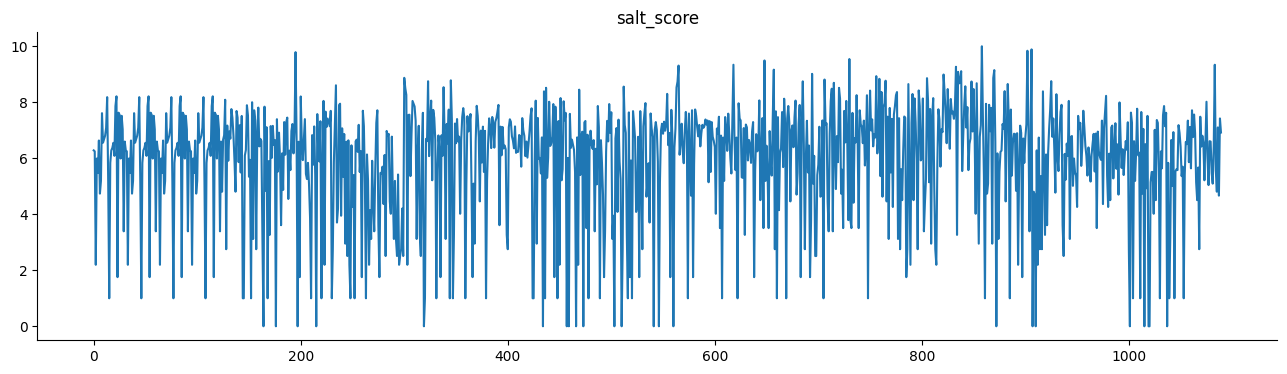

In [26]:
# @title salt_score

from matplotlib import pyplot as plt
recipe_contents['salt_score'].plot(kind='line', figsize=(16, 4), title='salt_score')
plt.gca().spines[['top', 'right']].set_visible(False)

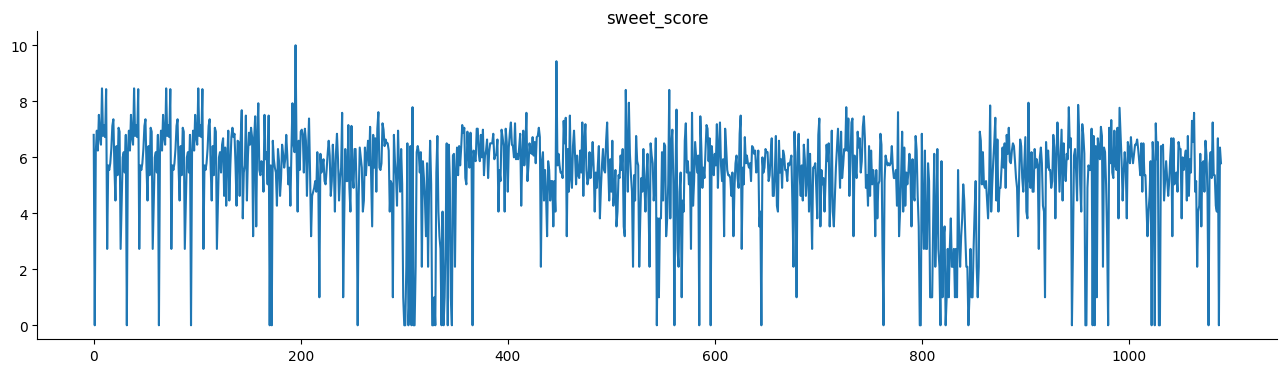

In [27]:
# @title sweet_score

from matplotlib import pyplot as plt
recipe_contents['sweet_score'].plot(kind='line', figsize=(16, 4), title='sweet_score')
plt.gca().spines[['top', 'right']].set_visible(False)

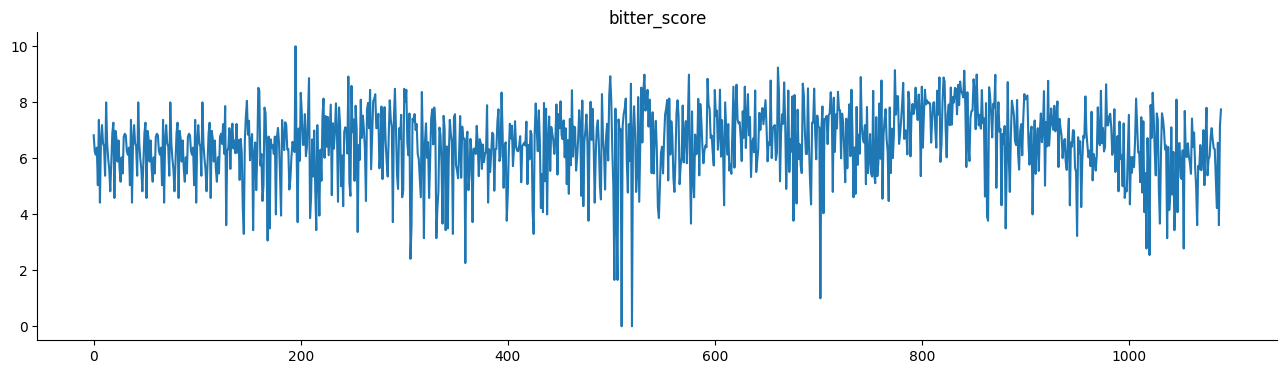

In [28]:
# @title bitter_score

from matplotlib import pyplot as plt
recipe_contents['bitter_score'].plot(kind='line', figsize=(16, 4), title='bitter_score')
plt.gca().spines[['top', 'right']].set_visible(False)

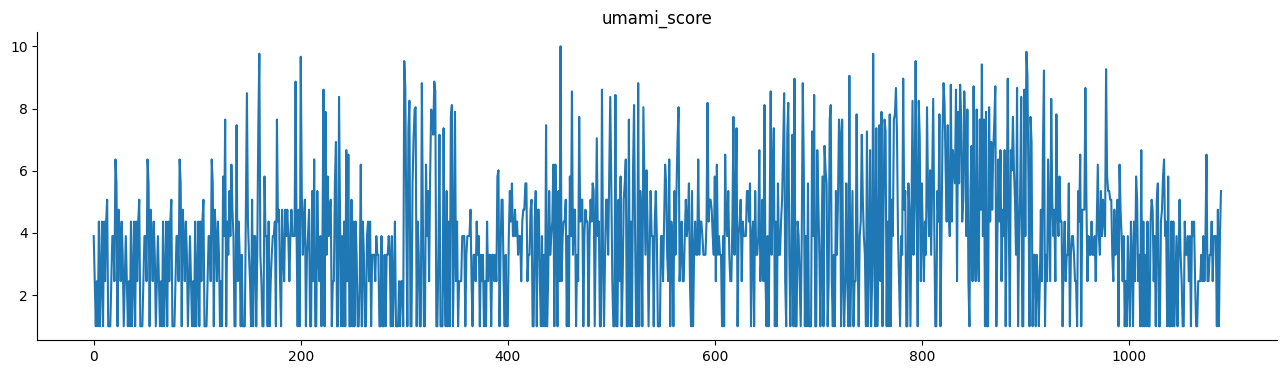

In [29]:
# @title umami_score

from matplotlib import pyplot as plt
recipe_contents['umami_score'].plot(kind='line', figsize=(16, 4), title='umami_score')
plt.gca().spines[['top', 'right']].set_visible(False)

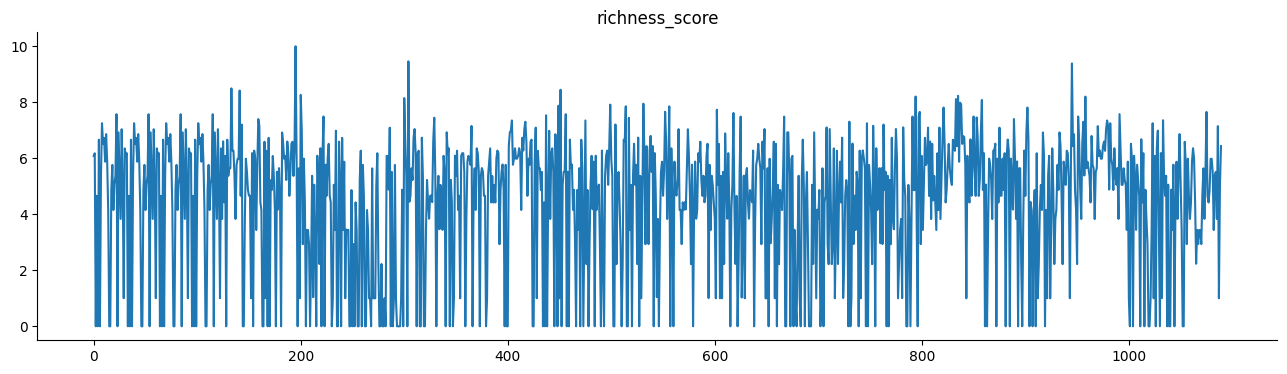

In [30]:
# @title richness_score

from matplotlib import pyplot as plt
recipe_contents['richness_score'].plot(kind='line', figsize=(16, 4), title='richness_score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [31]:
recipe_contents.to_csv('gdrive/My Drive/FooDB/recipe_contents.csv', index = False)

# Recommendation System

In [32]:
#Import all the required packages
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
# Load the recipe_contents.csv file into a Pandas dataframe
contents = pd.read_csv('gdrive/My Drive/FooDB/recipe_contents.csv')

In [34]:
contents

,recipe_name,ingredients,url,nutrition,salt_score,sweet_score,bitter_score,umami_score,richness_score
0,Apple-Cranberry Crostada,"3 tablespoons butter, 2 pounds Granny Smith ap...",https://www.allrecipes.com/recipe/76931/apple-...,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...",6.281952,6.800545,6.821508,3.898806,6.083491
1,Apple Pie by Grandma Ople,"8 small Granny Smith apples, or as needed, ½ c...",https://www.allrecipes.com/recipe/12682/apple-...,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...",6.247391,0.000000,6.250355,2.449403,6.179559
2,Sarah's Homemade Applesauce,"4 apples - peeled, cored and chopped, ¾ cup w...",https://www.allrecipes.com/recipe/51301/sarahs...,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...",2.195957,6.182509,6.123138,1.000000,0.000000
3,Apple Crisp,"10 cups all-purpose apples, peeled, cored and ...",https://www.allrecipes.com/recipe/12409/apple-...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...",5.991226,6.950415,6.379036,2.449403,4.660309
4,Apple Pie Filling,"18 cups thinly sliced apples, 3 tablespoons le...",https://www.allrecipes.com/recipe/12681/apple-...,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...",5.475125,6.239695,5.039231,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...
1085,Date-Nut Balls,"14 tablespoons butter, 1 cup pitted chopped da...",https://www.allrecipes.com/recipe/240653/date-...,"Total Fat 5g 6%, Saturated Fat 2g 12%, Cholest...",4.806321,4.059829,4.221638,1.000000,3.832755
1086,Jamaica Cake,"2 cups white sugar, 1 ½ cups vegetable oil, 1 ...",https://www.allrecipes.com/recipe/7509/jamaica...,"Total Fat 33g 43%, Saturated Fat 4g 21%, Chole...",7.102513,6.677955,6.553487,4.746652,7.149428
1087,Best Hot Sauce,"10 fresh hot chile peppers, stems removed, 1 ...",https://www.allrecipes.com/recipe/242153/best-...,"Total Fat 1g 1%, Saturated Fat 0g 1%, Sodium 2...",4.665661,0.000000,3.611982,1.000000,1.000000
1088,Moist Date Nut Bread,"2 ½ cups chopped dates, ¼ cup butter, 1 cup bo...",https://www.allrecipes.com/recipe/51446/moist-...,"Total Fat 10g 13%, Saturated Fat 3g 16%, Chole...",7.422668,6.348182,7.156895,3.898806,5.052798


In [35]:
# Get all taste ratings into a separate dataframe
taste_combined = contents[['salt_score', 'sweet_score', 'bitter_score', 'umami_score', 'richness_score']]

In [36]:
taste_combined

,salt_score,sweet_score,bitter_score,umami_score,richness_score
0,6.281952,6.800545,6.821508,3.898806,6.083491
1,6.247391,0.000000,6.250355,2.449403,6.179559
2,2.195957,6.182509,6.123138,1.000000,0.000000
3,5.991226,6.950415,6.379036,2.449403,4.660309
4,5.475125,6.239695,5.039231,1.000000,0.000000
...,...,...,...,...,...
1085,4.806321,4.059829,4.221638,1.000000,3.832755
1086,7.102513,6.677955,6.553487,4.746652,7.149428
1087,4.665661,0.000000,3.611982,1.000000,1.000000
1088,7.422668,6.348182,7.156895,3.898806,5.052798


In [37]:
# Calculate the cosine similarity matrix between the taste profiles
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity = cosine_similarity(taste_combined)

In [38]:
# Create a dataframe with the cosine similarity scores
similarity_df = pd.DataFrame(cosine_similarity,
                             index = contents['recipe_name'],
                             columns = contents['recipe_name'])

In [39]:
similarity_df

recipe_name,Apple-Cranberry Crostada,Apple Pie by Grandma Ople,Sarah's Homemade Applesauce,Apple Crisp,Apple Pie Filling,Easy Apple Crisp with Oat Topping,Easy Apple Cider,Apple-Cranberry Crisp,Old-Fashioned Apple Dumplings,Southern Fried Apples,...,Coconut Date Bars,Great-Grandma Cathy's Date Loaf Candy,Power Cookies,Reshteh Polo (Persian Noodle Rice),Paleo Almond Date Cookies,Date-Nut Balls,Jamaica Cake,Best Hot Sauce,Moist Date Nut Bread,Chef John's Chocolate Energy Bars
recipe_name,,,,,,,,,,,,,,,,,,,,,
Apple-Cranberry Crostada,1.000000,0.859112,0.827700,0.991293,0.868125,0.999832,0.858818,0.994254,0.997994,0.975986,...,0.992403,0.990881,0.981552,0.969118,0.988750,0.980198,0.995745,0.775813,0.992820,0.990900
Apple Pie by Grandma Ople,0.859112,1.000000,0.545199,0.820582,0.631300,0.853174,0.574642,0.842412,0.841583,0.851555,...,0.894385,0.813651,0.853665,0.899191,0.909080,0.873128,0.877355,0.899511,0.871301,0.898811
Sarah's Homemade Applesauce,0.827700,0.545199,1.000000,0.875256,0.935371,0.828470,0.943688,0.860764,0.817590,0.813972,...,0.801155,0.870734,0.850620,0.753908,0.747210,0.809623,0.774630,0.608924,0.835534,0.790259
Apple Crisp,0.991293,0.820582,0.875256,1.000000,0.918446,0.990300,0.911624,0.995255,0.991413,0.984163,...,0.971821,0.994790,0.979539,0.962369,0.964121,0.987084,0.977745,0.775169,0.989673,0.969772
Apple Pie Filling,0.868125,0.631300,0.935371,0.918446,1.000000,0.864744,0.994422,0.882091,0.869980,0.867651,...,0.826072,0.885838,0.913589,0.871712,0.810133,0.885660,0.833169,0.755427,0.899656,0.834032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Date-Nut Balls,0.980198,0.873128,0.809623,0.987084,0.885660,0.977084,0.868476,0.984315,0.981548,0.995298,...,0.961735,0.978914,0.963331,0.974558,0.965205,1.000000,0.973365,0.819396,0.982094,0.961088
Jamaica Cake,0.995745,0.877355,0.774630,0.977745,0.833169,0.995542,0.821758,0.981913,0.995320,0.966247,...,0.991335,0.976618,0.974323,0.974451,0.996566,0.973365,1.000000,0.778368,0.987570,0.992631
Best Hot Sauce,0.775813,0.899511,0.608924,0.775169,0.755427,0.765329,0.685731,0.760403,0.757531,0.769104,...,0.794431,0.728744,0.847522,0.882105,0.809933,0.819396,0.778368,1.000000,0.836056,0.816691


In [41]:
# Input a recipe index
recipe_index = int(input('Enter a recipe you like: '))

Enter a recipe you like: 4


In [42]:
def get_top_similar_items(item_index, item_embeddings, top_k=10):

    similarity_scores = cosine_similarity[item_index]
    top_k_similar_indices = similarity_scores.argsort()[::-1][1:top_k + 1]  # Exclude the item itself
    return top_k_similar_indices

top_10_similar_indices = get_top_similar_items(recipe_index, similarity_df)
print(f"Top 10 similar recipes to item index {recipe_index}:{top_10_similar_indices}")

Top 10 similar recipes to item index 4:[ 66  35  97 279  16  78 109  47 294 881]


# General notes

**Food items with 0g of carbohydrate:**
255
304
328

**Food items with 0g of total sugar:**
255
300
301
304
307
309
310
328
330
336
342
346
799
818
823
845
958
965
980
1087

**Food items with 0g of total sugar and more than 0g of fiber:**
300
309
330
336
799
818
823
845
958
965
980

**Food items with 0g of total fat:**
2
4
6
15
16
23
33
35
37
46
47
54
64
66
68
77
78
85
95
97
99
108
109
116
164
176
181
205
220
223
230
235
236
239
247
248
250
252
256
259
262
263
268
276
277
279
280
282
287
293
294
295
296
303
312
315
316
320
344
347
373
379
397
400
424
425
436
438
445
448
452
457
459
466
470
473
478
484
490
493
502
515
516
541
557
560
579
615
622
638
652
660
668
669
673
676
683
687
691
692
693
729
731
739
746
748
755
766
785
786
789
796
863
872
881
885
893
897
904
910
919
1001
1004
1011
1015
1019
1026
1039
1040
1052
